# **PREDICTING PRICES OF BITCOIN**



## **Abstract**

**Name:** Priyanka Vepuri

**Email:** pvepu001@odu.edu

**Web Portfolio:** https://www.cs.odu.edu/~pvepuri

### **Data Source:**

**Dataset URL:** https://finance.yahoo.com/quote/BTC-USD/history?p=BTC-USD

**Problem Statement:** Its hard to envision what might have been the condition in the earlier years for instance like 2012 or 2013 when the cost of bitcoin was roughly 10 dollars without realizing that it would have crossed $18000 later on as a result of which individuals are currently remorseful. So this is the enormous predicament which the commoners face in the terms of Cryptocurrency. We truly don't have any desire to slacken out on the following bounce in cost however we don't know when that hop will occur or not occur. So how might we conceivably take care of this issue.
Since its a real time data, I will be considering the data only till feb 6 2021. 


### **Project Plan:** 
In order to successfully build the project, it would be divided into the following stages:

### Stage-1: Gather, explore, and visualize the data.


### Stage-2: Difference the data and check for stationarity.


### Stage-3: Plot the ACF and PACF for the differenced data


### Stage-4: Start modeling by searching for the best parameters.


### Stage-5: Train and test the model with the optimized parameters.


### Stage-6: Forecast the future of Cryptocurrency.

### **End Goal:** 
To take care of this issue, Machine learning can provide us great solution. It can deliver insights which we need to find out about the future of Cryptocurrency. It would reveal to us the experiences as well as it would convey the pattern and the bearing to anticipate the development of the costs. To achieve this business objective, I would utilize Time Series Machine learning models which would consider the past data, patterns and insights to foresee the future.The Time Series models that I will be focusing on would be SARIMA. SARIMA or ARIMA is a relatively basic Time Series model that I will be implementing and explaining the necessary components involved in it. After modeling, I will compare the results from each model’s unique insights into Bitcoin’s future.


# Stage-1: Gather, explore and visualize the data

In [ ]:
import pandas as pd
from google.colab import files
uploaded = files.upload() 

Saving BTC-USD.csv to BTC-USD (13).csv


##Reading the raw data:

* Retrieving the historical data of the Bitcoin being downloaded from the yahoo finance website and displaying the initial six records.

* The ‘**read_csv()**’ function from the ‘**pandas**’ library is used to load the data into dataframe from the remote ‘url’.

* By using '**head()**' function, we can display the first few records of the dataset.





In [ ]:
import io
bitcoin = pd.read_csv(io.BytesIO(uploaded['BTC-USD.csv']))

### **First few records of the data set:**

In [ ]:
bitcoin.head(6)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-02-06,9617.821289,9824.619141,9539.818359,9729.801758,9729.801758,3.762882e+10
1,2020-02-07,9726.002930,9834.716797,9726.002930,9795.943359,9795.943359,3.452272e+10
2,2020-02-08,9793.070313,9876.749023,9678.910156,9865.119141,9865.119141,3.517204e+10
3,2020-02-09,9863.894531,10129.435547,9850.392578,10116.673828,10116.673828,3.580788e+10
4,2020-02-10,10115.559570,10165.765625,9784.563477,9856.611328,9856.611328,3.938655e+10
5,2020-02-11,9855.891602,10210.052734,9729.334961,10208.236328,10208.236328,3.764806e+10


##Exploring the data:

* Since the date column is not in the date-time format, we will initially change over it to date time with the goal that it is easier for the machine learning model to process on the right type of data.

* With the goal that there will not be any issue while demonstrating/modeling.

* Setting the date column as index.







In [ ]:
# Converting to datetime

bitcoin['Date'] = pd.to_datetime(bitcoin.Date)

In [ ]:
bitcoin['Date']

0     2020-02-06
1     2020-02-07
2     2020-02-08
3     2020-02-09
4     2020-02-10
         ...    
362   2021-02-02
363   2021-02-03
364   2021-02-04
365   2021-02-05
366   2021-02-06
Name: Date, Length: 367, dtype: datetime64[ns]

Observation:

Converted the date into datetime format and a new column 'date' is shown

In [ ]:
# Setting the index as the dates

bitcoin.set_index('Date', inplace=True)

Observation:

Converted the particular 'date' column into index

In [ ]:
# Selecting only the dates from 2020-02-06 onwards

bitcoinClose = bitcoin[['Close']].loc['2020-02-06':]

Observation:

A separate single dataframe is been shown for bitcoinClose

In [ ]:
# Selecting only the dates from 2020-02-06 onwards

bitcoinOpen = bitcoin[['Open']].loc['2020-02-06':]
bitcoinHigh = bitcoin[['High']].loc['2020-02-06':]
bitcoinLow = bitcoin[['Low']].loc['2020-02-06':]
bitcoinAdjClose = bitcoin[['Adj Close']].loc['2020-02-06':]
bitcoinVolume = bitcoin[['Volume']].loc['2020-02-06':]

Observation:

Similar to the before step, a separate single dataframe is been shown for bitcoinOpen, bitcoinHigh, bitcoinLow, bitcoinAdjClose and bitcoinVolume

In [ ]:
# Selecting only the dates from 2020-02-06 onwards
bitcoin = bitcoin[['Close']].loc['2020-02-06':]
bitcoin

,Close
Date,
2020-02-06,9729.801758
2020-02-07,9795.943359
2020-02-08,9865.119141
2020-02-09,10116.673828
2020-02-10,9856.611328
...,...
2021-02-02,35510.289063
2021-02-03,37472.089844
2021-02-04,36926.066406


Observation:
 
 A dataframe ‘bitcoin’ is made as the analysis and modelling is done based on the closing price on the bitcoin.

## Visualization of the Data:

* Retrieving the data from 2020-02-06 onwards, after doing the data wrangling part, let's focus on building visualizations.

* The first visualization is going to be focused on the bitcoin’s price movement over the most recent year i.e., from 2020-02-06 to 2021-02-06.

* Closing price of the bitcoin:
 1. We plot our data frame to see Bitcoin's price movement on its closing value in the course of the most recent year. 

 2. The most recent year was chosen since Bitcoin, and Cryptocurrency turned out to be extremely famous and is a better representation of current market trends.





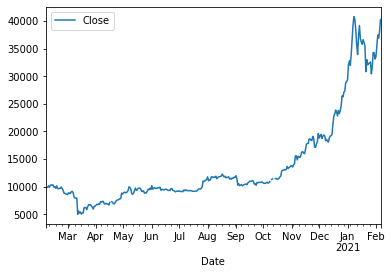

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import pyplot
bitcoinClose.plot()
pyplot.show()

Observation:

From the above visualization, we can see the closing price of the bitcoin from Feb 2020 till Feb 2021, where there is an exponential rise till the start of January 2021 followed by a sudden dip from January to the start of February 2021 and afterward again a rise in Feb 2021. 

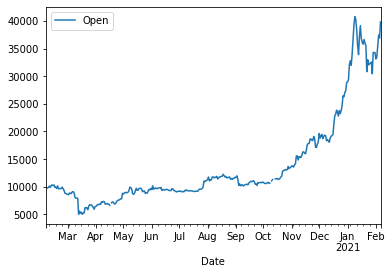

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import pyplot
bitcoinOpen.plot()
pyplot.show()

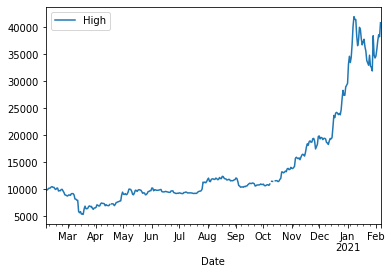

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import pyplot
bitcoinHigh.plot()
pyplot.show()

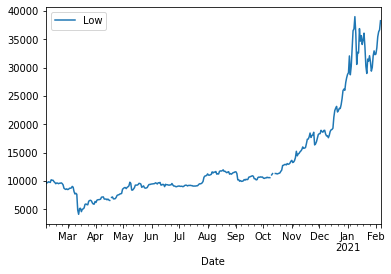

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import pyplot
bitcoinLow.plot()
pyplot.show()

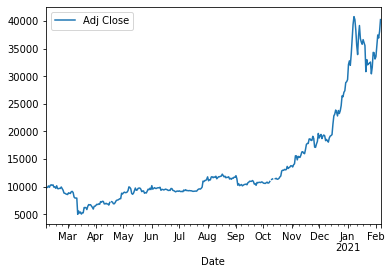

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import pyplot
bitcoinAdjClose.plot()
pyplot.show()

Observation:

Since the values of other attributes like "Open, High, Low AdjClose" are too close to the closing price values, there is no much difference in the visualizations too.

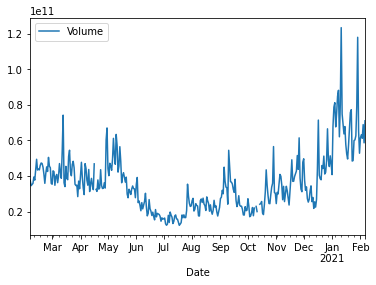

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import pyplot
bitcoinVolume.plot()
pyplot.show()

**Observation**:

There was very less fluctuation till january 2021. However, at that point there was an abrupt increment and decline from jan to feb 2021.


# Stage-2: Difference the Data and Check for Stationarity

## Differencing the Data:

* Let’s prepare the data for modeling by making the data stationary. 

* This is done by simply differencing the data and testing for stationarity by using statistical test called the **Dickey-Fuller test.** 

* We are aiming for a **P-Value** of less than the critical value of 5%, or simply trying to get as close to zero as possible. 

* For even a lower P-value, we’ll take the log of the prices, then difference the log instead of just differencing the prices.

In [ ]:
import numpy as np
# Converting the data to a logarithmic scale
bitcoin_log = pd.DataFrame(np.log(bitcoin.Close))

In [ ]:
bitcoin_log

,Close
Date,
2020-02-06,9.182949
2020-02-07,9.189724
2020-02-08,9.196760
2020-02-09,9.221940
2020-02-10,9.195898
...,...
2021-02-02,10.477578
2021-02-03,10.531352
2021-02-04,10.516673


**Observation**:

A dataframe 'bitcoin_log' is shown which converts the original closing prices of the bitcoin to their log values respectively.

In [ ]:
# Differencing the log values
log_diff = bitcoin_log.diff().dropna()

In [ ]:
log_diff

,Close
Date,
2020-02-07,0.006775
2020-02-08,0.007037
2020-02-09,0.025180
2020-02-10,-0.026043
2020-02-11,0.035052
...,...
2021-02-02,0.057168
2021-02-03,0.053774
2021-02-04,-0.014679


**Observation**:

Differenced values of the log values are shown.

## Stationarity:

* Stationarity removes trends from the dataset which can be extremely intrusive to the models.

* Stationarity makes the models perform and predict better.

In [ ]:
import statsmodels.tsa.stattools
from statsmodels.tsa.stattools import adfuller
# Using the Dickey-Fuller test to check for stationarity
results = adfuller(log_diff.Close)
print(f"P-value: {results[1]}")

P-value: 1.1154838854147381e-13


In [ ]:
results

(-8.518745235271664,
 1.1154838854147381e-13,
 3,
 355,
 {'1%': -3.448905534655263,
  '10%': -2.5711258103550882,
  '5%': -2.8697161816205705},
 -1171.8126061913558)

**Obesrvation**:

Hence, from the results above it is clear that the P-value is < 0.05, the data is stationary, and is ready for modeling.


## Visualization of the Stationary data:

* Apart from the statistical analysis, I have also shown the plot which determines the stationarized time series data.

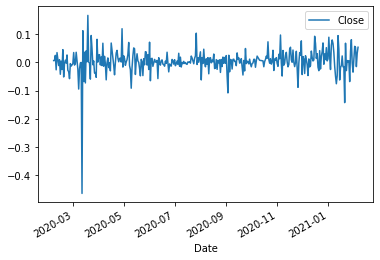

In [ ]:
log_diff.plot()
pyplot.show()

**Observation**:

The mean and variance are constant to time. There are no many fluctuations. Hence, the data is stationary.

# Stage-3: Plotting the ACF and PACF for the differenced Data

* We shall now plot the **Autocorrelation Function** (ACF) and **Partial Autocorrelation Function** (PACF).




## Autocorrelation Function:

* Since we are working with the daily data,
 **ACF** shows us which day in the past correlates the most with the current day with respect to the days in between.

### Visualization of ACF

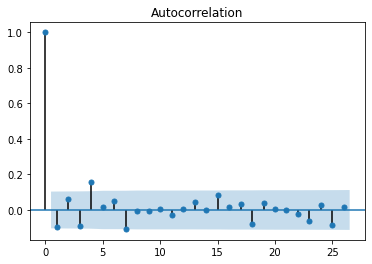

In [ ]:
# Autocorrelation Plot
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
sm.graphics.tsa.plot_acf(log_diff)
plt.show()

## Partial Autocorrelation Function:

* Since we are working with the daily data, **PACF** shows us which day in the past correlates directly to the current day by ignoring the days in between.

### Visualization of PACF

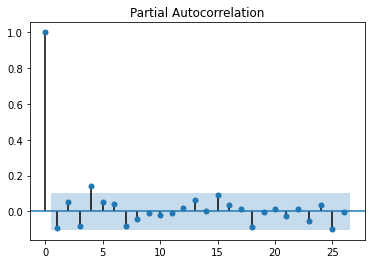

In [ ]:
# Partial Autocorrelation Plot
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
sm.graphics.tsa.plot_pacf(log_diff)
plt.show()


# Stage-4: Start modeling by searching for the best parameters.

## SARIMA Modeling
Modeling the data by using the SARIMA model.

## Optimizing Parameters
* In order to get the best performance out of the model, we must find the optimum parameters. 
* We do this by trying many different combinations of the parameters and selecting the one with the relatively lowest AIC score.

In [ ]:
import itertools

p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [ ]:
pdq, seasonal_pdq 

([(0, 0, 0),
  (0, 0, 1),
  (0, 1, 0),
  (0, 1, 1),
  (1, 0, 0),
  (1, 0, 1),
  (1, 1, 0),
  (1, 1, 1)],
 [(0, 0, 0, 12),
  (0, 0, 1, 12),
  (0, 1, 0, 12),
  (0, 1, 1, 12),
  (1, 0, 0, 12),
  (1, 0, 1, 12),
  (1, 1, 0, 12),
  (1, 1, 1, 12)])

**Observation**:

Made combinations of (p, d, q) x (seasonal pdq) value.

In [ ]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(bitcoin_log,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:2652.6423326565673


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:2569.960997947481
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:-321.0687907829688
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:-313.2792423693571
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:-350.61835313553377


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:-351.3494514002414
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:-315.10310250523264


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:-319.80197780471224
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:2166.0991783573118


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2102.1750877527465
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:-596.0871019379088
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:-567.0889380663992


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:-621.3923409709557


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:-614.7770326167824


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:-570.0704736049479


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:-600.4732255726456
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:-1243.840870798997
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:-1194.0709183747567
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:-965.0569897664769


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:-1119.2264710853412
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:-1197.1218401555393


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:-1217.0844027349763


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:-1027.7710501589677
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:-1109.5842006705318
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:-1239.8286275335304
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:-1189.7378700447157


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:-962.8295590830447


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:-1115.1353051270908
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:-1197.161723850662


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:-1212.22802818421


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:-1026.6192402162271


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:-1106.0539624955286
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:-1249.4460690883827


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:-1197.0886678569461
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:-979.2036631054209
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:-1120.288366723194


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:-1198.0280118666844


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:-1221.2572549985364


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:-1032.6502990519334


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:-1109.5115275883309
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:-1246.0105378043452


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:-1135.0426872219332


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:-975.6102625212651


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:-1117.6249500666647


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:-1198.5210064040143


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:-1217.4401705310072


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:-1030.9806511617269


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:-1108.1505622286631
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:-1244.5577283928822


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:-1194.3406047036124


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:-966.8723645301168


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:-1119.385843165506
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:-1194.3756574928511


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:-1216.3889510274857


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:-1023.8338838489149
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:-1110.0506653702037
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:-1243.6427147173285


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:-1192.5571060897105
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:-966.0690441709505


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:-1118.0880566196997


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:-1195.878462365834


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:-1203.9370623947475


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:-1025.0746229372212


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:-1107.1722918388841


In [ ]:
results


**Observation**:

The combination of (pdq) x (seasonal pdq), which has the lowest AIC value (-1249.4460690883827) is (1, 0, 0)x(0, 0, 0, 12)


# Stage-5: Train and test the model with the optimized parameters.

## Fitting and Training
Now that we have our parameters, let’s go ahead and train and fit the model to Bitcoin’s prices.

In [ ]:
import statsmodels.api as sm
sm.tsa.statespace.SARIMAX


# Splitting 80/20
index = round(len(bitcoin_log)*.80)
train = bitcoin_log.iloc[:index]
test = bitcoin_log.iloc[index:]

# Fitting the model to the training set
model =  statsmodels.tsa.statespace.sarimax.SARIMAX (train, 
                order=(1, 0, 0), 
                seasonal_order=(0,0,0,12), 
                freq='D', 
                enforce_stationarity=False, 
                enforce_invertibility=False)
output = model.fit()

In [ ]:
output

**Observation**:

The model has been successfully executed with the combination of pdq and seasonal pdq for the corresponding AIC value shown above.

# Stage-6: Forecast the future of Cryptocurrency.

* To test the model’s performance even further, we can see how its predictions line up with the values that we already know by plotting them out.

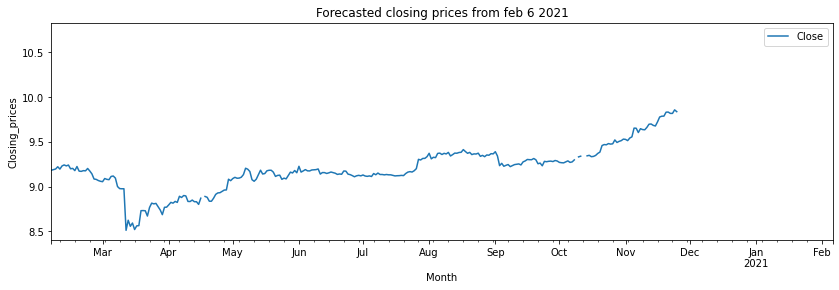

In [ ]:
pred = output.get_prediction(start=pd.to_datetime('2021-02-06'), dynamic=False)
pred_ci = pred.conf_int()
y = train
ax = train['2020':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, alpha=.7, figsize=(14, 4))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_title('Forecasted closing prices from feb 6 2021')
ax.set_xlabel('Month')
ax.set_ylabel('Closing_prices')
plt.show()
#label='One-step ahead Forecast'
#ax.get_legend().remove()

**Observation:**

Forecasted results:
In march 2021 there was a sudden dip and then there was a gradual increase in the bitcoin price. 

### **Conclusion**

According to the business value, I chose the closing price to be forecasted because it is the ultimate price everyone is interested. By selecting the best combination of p, d, and q values for the lowest AIC score, I forecasted the model. The results are shown for the future price which helps the people in making the necessary decisions to invest in bitcoin or not.

### **Summary**

From the exploratory data analysis, we see that for all of the variables except that AdjClose there was a dip in march and then increase
Proved that the data is stationarity by testing and visualizing.
Selected the best pdq combination and presented the forecasting model.

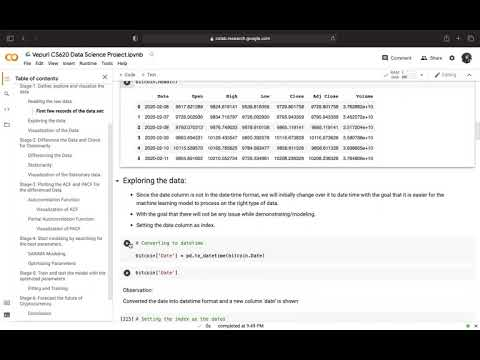

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('mjZUvaJNy_s')

### **Future Work:**


* Various other time series forecasting methods can be used.
* Using them we can predict the future observations.





